In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

K.set_image_data_format('channels_last')
np.set_printoptions(precision=4, suppress = True)

In [3]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [4]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

490127640.npz
(300, 64, 64, 3)


In [5]:
plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)
plot_model(vae.decoder, to_file='./vae/decoder.png', show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


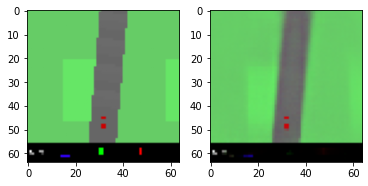

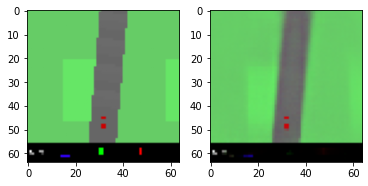

In [6]:
### output from one episode

for idx in range(0,20):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

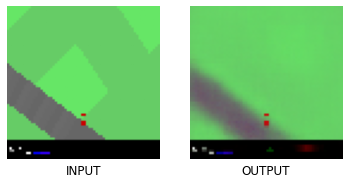

In [7]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [8]:
mus, log_vars, _  = vae.encoder.predict(np.array([obs]))
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [-0.0529 -0.0164  0.0023 -0.132   0.0135  0.1674  0.0496 -0.034  -0.1224
  0.1851  0.0843  1.5284 -0.0328 -0.0203  0.0111 -0.0017 -0.1615 -0.5841
 -0.0818 -0.045   0.5509  1.2351 -1.2664 -0.0982 -0.6127 -0.2884 -0.3713
  0.4064  0.0868  0.5984  0.0531 -0.0859]
log_var = [-0.0189 -0.0624 -0.0415 -0.0342  0.0408  0.0309 -0.0408  0.0215 -0.0596
 -0.0313 -0.0254 -2.1133 -0.0083 -0.1211  0.0116 -0.0541 -0.0415 -1.2802
  0.015  -0.1127 -1.2134 -3.5671 -3.2678  0.0065 -0.9175 -0.0904 -3.8382
 -0.0747 -0.1532 -1.284  -0.1111 -0.0266]
z = [[-0.0529 -0.0164  0.0023 -0.132   0.0135  0.1674  0.0496 -0.034  -0.1224
   0.1851  0.0843  1.5284 -0.0328 -0.0203  0.0111 -0.0017 -0.1615 -0.5841
  -0.0818 -0.045   0.5509  1.2351 -1.2664 -0.0982 -0.6127 -0.2884 -0.3713
   0.4064  0.0868  0.5984  0.0531 -0.0859]]


informative dimensions:


array([11, 17, 20, 21, 22, 24, 26, 29])

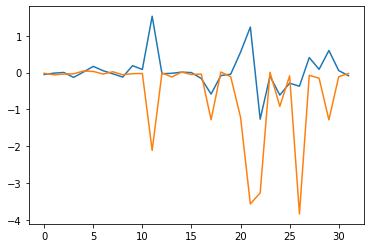

In [9]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.5)[0]
hot_zs

In [10]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [11]:
vae.encoder.predict(np.array([obs_data1[20]]))

[array([[-0.0085,  0.0347, -0.0061, -0.0551,  0.0033, -0.0172,  0.0107,
          0.0081, -0.0055,  0.058 ,  0.059 ,  0.6693, -0.048 , -0.0139,
          0.0115, -0.01  , -0.0006,  0.1331, -0.0044, -0.0768,  0.0615,
         -0.9123, -1.3648,  0.0146, -0.0543,  0.0206,  1.0438,  0.0817,
          0.1155,  0.132 ,  0.0041, -0.0328]], dtype=float32),
 array([[ 0.0166, -0.0169,  0.0131, -0.0391, -0.0231, -0.0028, -0.    ,
         -0.0324, -0.0191,  0.0205,  0.0153, -1.3041, -0.0455, -0.0007,
         -0.0125,  0.0061,  0.0145, -0.4189, -0.0378, -0.0845, -0.4016,
         -2.6611, -2.0044, -0.0009, -0.5079, -0.0232, -1.5156, -0.049 ,
         -0.0151, -2.7794,  0.0577, -0.0204]], dtype=float32),
 array([[ 0.1238,  0.2605, -0.2696, -0.6061, -1.2708,  1.6382, -1.9032,
          0.4249,  2.5973,  0.6556,  1.3323,  0.834 ,  0.83  , -1.0528,
         -0.8642, -1.395 , -1.021 ,  0.3684,  0.7516,  0.0406,  2.113 ,
         -1.0471, -0.9358, -2.5289, -1.4685, -0.2012,  0.9617, -0.1271,
          

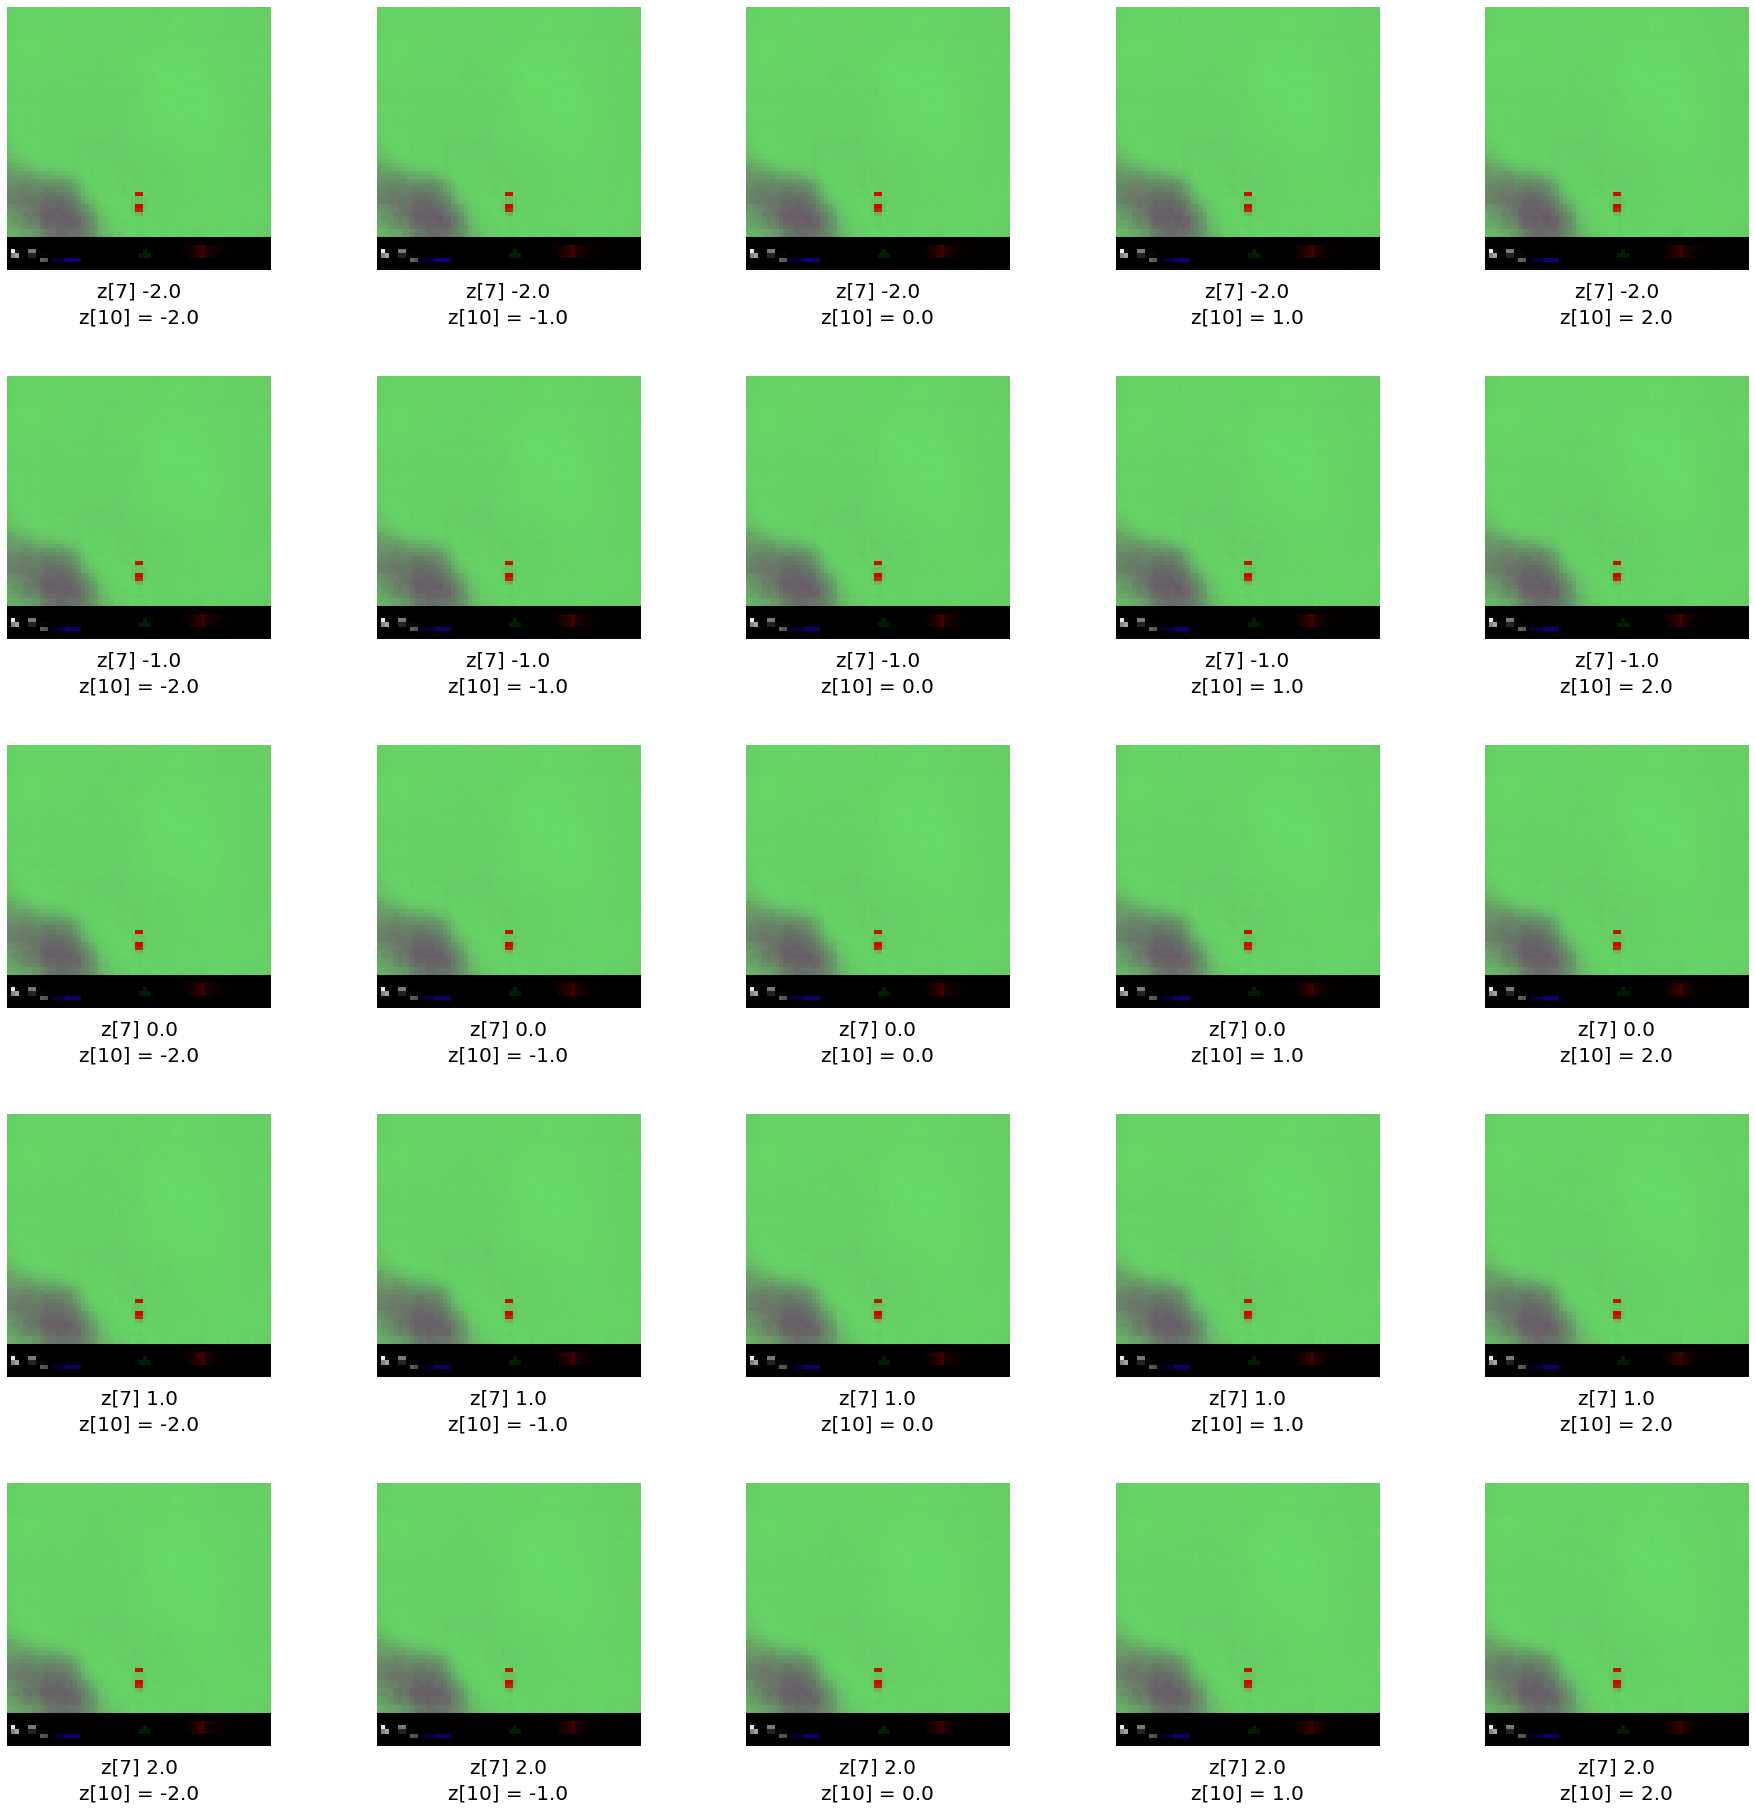

In [12]:
top_left = vae.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [13]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [14]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=0.13247910141944885, description='z0', max=3.0, min=-3.0), FloatSlider…

<function __main__.play_with_z(z0=0.1324791, z2=0.17447421, z4=-0.102843896, z5=-0.41831797, z6=0.52604836, z7=-1.1008117, z10=2.0835645, z15=-0.24974066, z24=1.2627566, z25=-0.59774894, z27=0.19176203)>